In [1]:
import sys
import scipy.io as sio
import numpy as np
sys.path.append("../src")
#import TopologicalAdvection_PBC as TA
import TopologicalAdvection as TA

In [2]:
filein_contents = sio.loadmat('tau.1.05_20000pt_.01step.mat')
times = filein_contents['times'][:,0].tolist()
xin = filein_contents['x_coordinates'].tolist()
yin = filein_contents['y_coordinates'].tolist()
print("There are ", len(times), " time-steps, and ",len(xin), " potential trajectories.")

There are  2227  time-steps, and  20000  potential trajectories.


In [3]:
numtraj_vals = [5,10,20,40,80,160,320,640,1280,2560,5120,10240,20000]
val_choice = 5
numtraj = numtraj_vals[val_choice]
traj = []
for t in range(len(times)):
    traj.append([[xin[i][t],yin[i][t]] for i in range(numtraj)])

In [4]:
tri = TA.triangulation2D(traj[0])
triInit = TA.triangulation2D(traj[0])
for i in range(1,len(times)): 
    tri.Evolve(traj[i])
    tri.MakeDelaunay()

In [5]:
#test loop initialization

loop1 = TA.Loop(triInit, rbands = [[0,1]], curves = None, Shear = False, mesh = False)
loop2 = TA.Loop(triInit, rbands = None, curves = [[[[1,-0.5],[5,-0.5],[5,0.5],[1,0.5]],True]], Shear = False, mesh = False)
loop3 = TA.Loop(triInit, rbands = None, curves = [[[[1,-0.5],[5,-0.5],[5,0.5],[1,0.5]],True]], Shear = True, mesh = False)
loop4 = TA.Loop(triInit, rbands = None, curves = None, Shear = True, mesh = True)

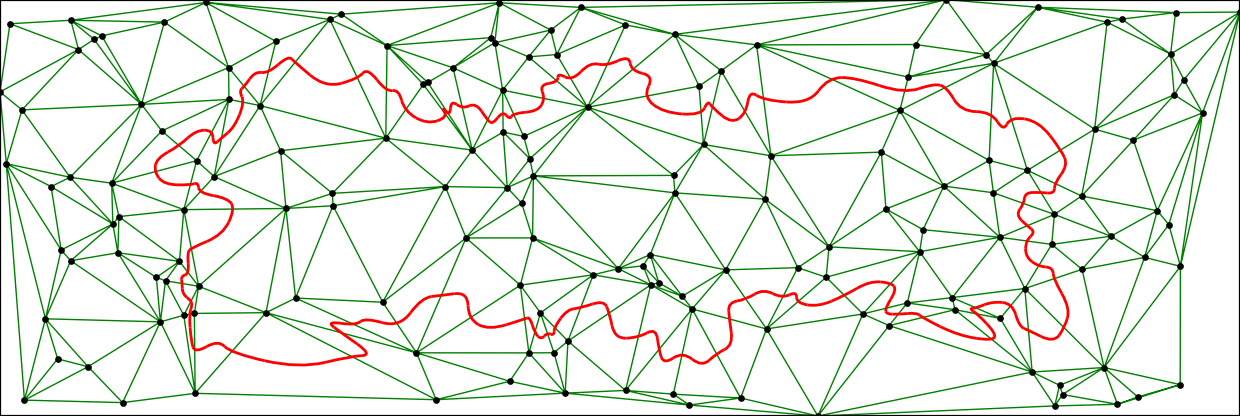

In [6]:
triInit.Plot(loop2)

In [7]:
tri.OperatorAction(loop1, index = None, Reverse = False, option = 3)
tri.OperatorAction(loop2, index = None, Reverse = False, option = 1)
tri.OperatorAction(loop3, index = None, Reverse = False, option = 2)
tri.OperatorAction(loop4, index = None, Reverse = False, option = 1)

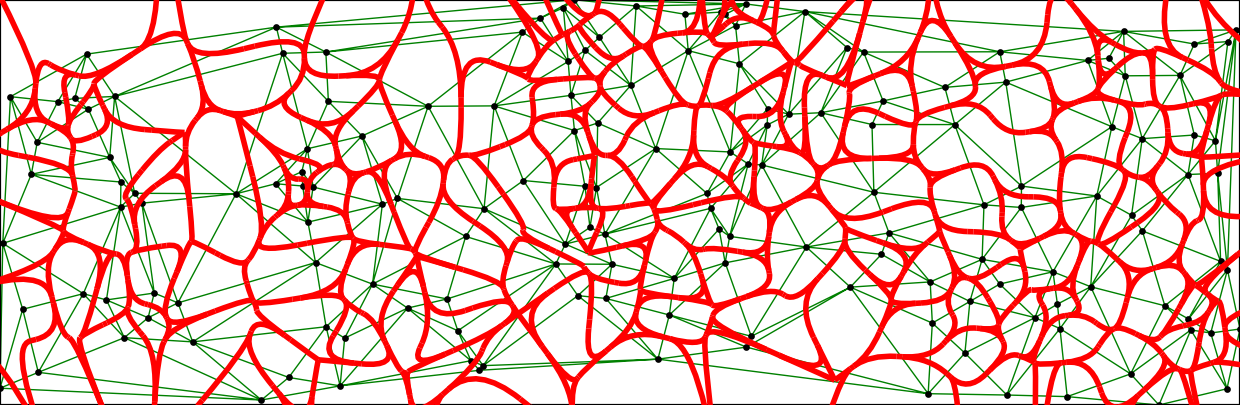

In [14]:
PP = TA.PrintParameters(Delaunay = True, linewidth_tt = 2, frac = 0.9)
tri.Plot(loop2,PP)